# Tutorial

Go through few examples.

First, import the following dependencies that we will be work with. 

In [38]:
import numpy as np
from signal_design import Axis, Relation, Signal, Spectrum
import matplotlib.pyplot as plt 

## Contents:
1. Introduction
2. Axis
3. Relation
4. Signal
5. Spectrum
6. Overriding methods

## 1. Introduction

The project was created for a simple design of signals. Easy and fast way 
to create signals. But to create a new one, we have developed a some new 
entities that help in creating of signals. 

Below representation structure of this objects in a project.
    
![schema](diagrams/out/diagram/Structure_signal-design.png)  
  
Following this diagram, we describe how to work with the library signal-design.

## 2. Axis

We should define the number of axis elements (size) in order to create a new instances of `Axis`. Size should be positive integer. By default sample is equal to 1, start of axis is 0 and end of axis is not define (equal `None`). You can changer them.

In [2]:
# An example of axis with sample 1 and start 0.
axis_1 = Axis(11)

# An example of axis with sample 0.5 and start 0.
axis_2 = Axis(11, 0.5)

# An example of axis with sample 0.5 and start 1.
axis_3 = Axis(11, 0.5, 1.)

Properties of axis can be changed. 

In [3]:
print(f"Before:\n{axis_3}")
axis_3.size = 5
print(f"After:\n{axis_3}")

Before:
size: 11
sample: 0.5
start: 1.0
end: None

After:
size: 5
sample: 0.5
start: 1.0
end: None



If the end value was not specified when the instance was created, then when it is requested, 
it will be obtained by multiplying the number of samples minus one by the sample 
and summing from the start value. And it remains recorded.

In [4]:
print(f"End of axis: {axis_3.end}")
print(f"Axis params:\n{axis_3}")

End of axis: 3.0
Axis params:
size: 5
sample: 0.5
start: 1.0
end: 3.0



Changing one of the three parameters: `size`, `sample` or `start` will change the `end` value of axis to undefined (None).

In [5]:
axis_3.start = 2.
print(axis_3)

size: 5
sample: 0.5
start: 2.0
end: None



If we have a `start`, `sample` and `size`, then it is not difficult to determine the `end` value of the axis. But it is not always possible to get the exact `end` value or the exact value of the `sample`.
For example, when the sampling step cannot be represented by a decimal number. For example, 1/3.
  
Below is an example representation of a sequence from 0 to 10 with 4 samples.

In [6]:
result = np.linspace(0, 10, 4)
print(result)
print(np.diff(result))
print(np.diff(np.diff(result)))

[ 0.          3.33333333  6.66666667 10.        ]
[3.33333333 3.33333333 3.33333333]
[ 0.0000000e+00 -4.4408921e-16]


As can be seen above, the discretization step cannot be represented exactly, then in this case, you can use the definition of the `end` value of the axis.

In [7]:
axis = Axis(4, 10/3, 0, 10)
print(axis.array)

[ 0.          3.33333333  6.66666667 10.        ]


The `array` property of the `Axis` class uses the `get_array` function, 
which uses the np.linspace function to get the np.ndarray sequence.
At the end is an example of how to change the `get_array` function 
if you are not satisfied with finding the np.ndarray sequence.
  
The `Axis` class does not check which sampling step and the number of samples 
in a given interval or the final value of the interval.
Due to the inaccuracy of determining one of the parameters. 
Thus, a situation is possible when the sampling step does not correspond 
to the number of samples.
And the result will depend on the parameters that a certain method uses.
See the documentation for details.

In [8]:
axis = Axis(4, 10/3, 0, 10)
print(f"Before:\n{axis.array}")
print(f"sample: {axis.sample}")
axis.end = 1000
print(f"After:\n{axis.array}")
print(f"smaple: {axis.sample}")

Before:
[ 0.          3.33333333  6.66666667 10.        ]
sample: 3.3333333333333335
After:
[   0.          333.33333333  666.66666667 1000.        ]
smaple: 3.3333333333333335


To avoid such situations, it is desirable to use the exact number of samples in a given interval for a given discretization.

In [9]:
axis = Axis(101, 0.1, -1)
print(f"Axis info:\n{axis}")
print(f"End of axis: {axis.end}")
print(f"Array axis:\n{axis.array}")

Axis info:
size: 101
sample: 0.1
start: -1
end: None

End of axis: 9.0
Array axis:
[-1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3
  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7
  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9  3.   3.1
  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2  4.3  4.4  4.5
  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5  5.6  5.7  5.8  5.9
  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9  7.   7.1  7.2  7.3
  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3  8.4  8.5  8.6  8.7
  8.8  8.9  9. ]


There are situations when you know the initial value, the sampling step and the final value.
In order not to count the number of samples, you can use the static method `Axis.get_using_end`.  
  
Let's create time axis. Start time is 0. end time is 10. sample of array 0.001

In [13]:
axis = Axis.get_using_end(start=0., end=10., sample=0.001)
print(f"Axis 1:\n{axis}")

axis_2 = Axis.get_using_end(0.0, 0.25, 0.1, False)
print(f"Axis 2:\n{axis_2}")
print(f"End of Axis 2: {axis_2.end}")

Axis 1:
size: 10001
sample: 0.001
start: 0.0
end: 10.0

Axis 2:
size: 3
sample: 0.1
start: 0.0
end: None

End of Axis 2: 0.2


The important feature is the number of samples per axis, 
then the sampling step is next in importance, 
and then the start of the axis.
The final value has less meaning and is only used by some methods.
But when they are defined exactly, the desired correct result can be obtained.

## 3. Relation
A relation instance is a representation of some mathematical functions, such as
y = f(x).

Look at building simple function of sin with frequency 1 Hz.

In [17]:
time = Axis.get_using_end(0., 10., 0.01)
amplitude = np.sin(2*np.pi*time.array)
sin_1 = Relation(time, amplitude)

sin_1- instance of class `Relation` represent dependencies between time and 
amplitude such as mathematical function 

$$ amplitude = sin(2\cdot\pi\cdot time) $$

Relation instance have same properties as ArrayAxis.
Also have other properties: `x`, `y`.

We can use `matplotlib` to show result in next section. 

Text(0.5, 1.0, 'Sin 1Hz')

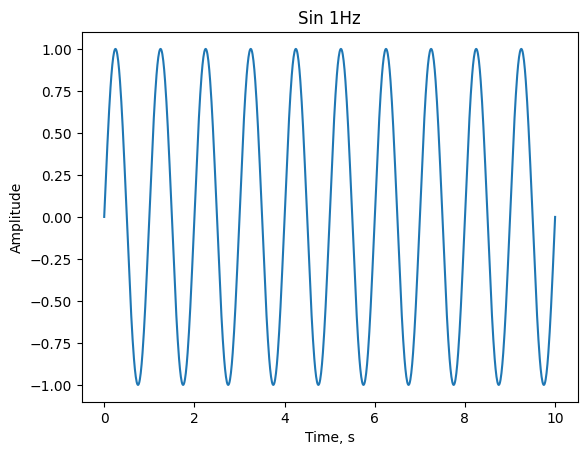

In [18]:
r_time, r_amplitude = sin_1.get_data()
plt.plot(r_time, r_amplitude)
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.title('Sin 1Hz')

Also you can find maximum and minimum of relation

In [19]:
print(sin_1.max())
print(sin_1.min())

1.0
-1.0


Norm of function.

In [20]:
sin_1.get_norm()

500.0

Interpolate of function expected by instance of Relation using new array axis

In [21]:
time_new = Axis.get_using_end(0.,10., 0.0005)
interpolate_sin_1 = sin_1.interpolate_extrapolate(time_new)

Shift relation, equal y=f(x+c) where c - is shift constant.

In [22]:
shifted_sin_1 = sin_1.shift(2)

Also you can select interesting segment of data using to methods, 
select_data method or use square brackets.

Text(0.5, 1.0, 'Sin 1Hz')

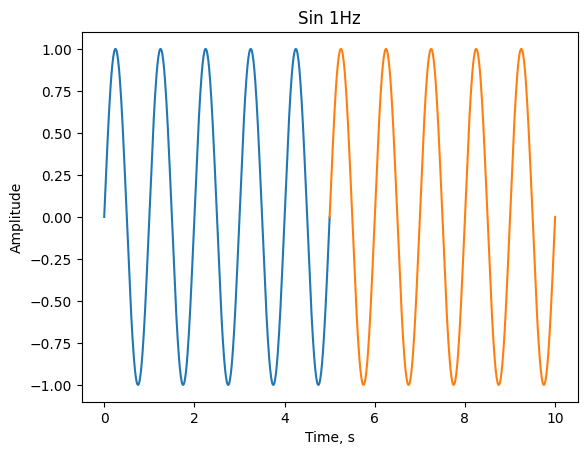

In [24]:
r_time, r_amplitude = sin_1.get_data()
plt.plot(*sin_1.select_data(0., 5.).get_data())
plt.plot(*sin_1[5.:10.].get_data())
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.title('Sin 1Hz')


cumulative integration and differentiation of function

Text(0.5, 1.0, 'Functions')

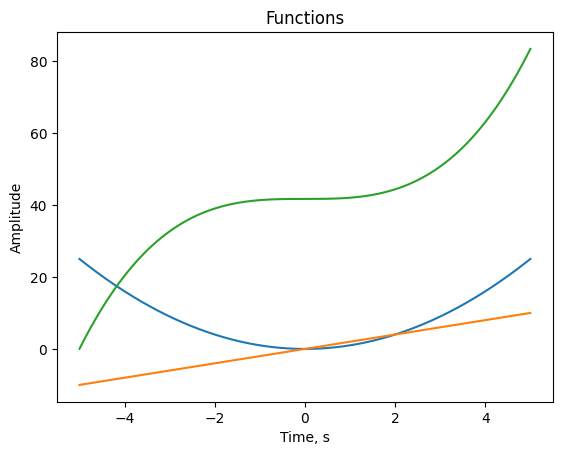

In [25]:
time_5 = Axis.get_using_end(-5., 5., 0.001)
y2 = Relation(time_5, time_5.array**2)
diff_y2 = y2.diff()
integration_y2 = y2.integrate()

plt.plot(*y2.get_data())
plt.plot(*diff_y2.get_data())
plt.plot(*integration_y2.get_data())
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.title('Functions')

exponent of function. 
$$ y = f(x) $$ 
$$ r = e^y $$
equal:


In [26]:
r = sin_1.exp()

With instance of class `Relation` we can use different mathematical operations 
(+, -, *, /, **, +=, -=, /=, *=). 
Operation can be with other instance of class `Relation` or numbers.
Next examples with number. Subtraction constant from sin_1.

Text(0.5, 1.0, 'Sin 1Hz')

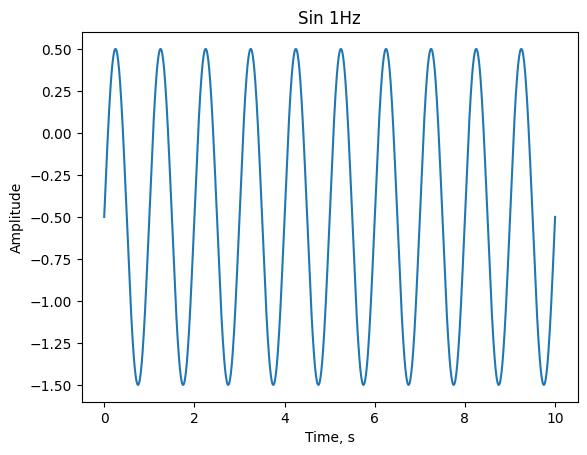

In [27]:
sub_sin_1 = sin_1-0.5
plt.plot(*sub_sin_1.get_data())
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.title('Sin 1Hz')


To demonstrate operation with other `Relation` instance, let's create other sin 
function with 20Hz. And summing two instances sin_1 and sin_20.

Text(0.5, 1.0, 'Sin 1Hz + Sin 20Hz')

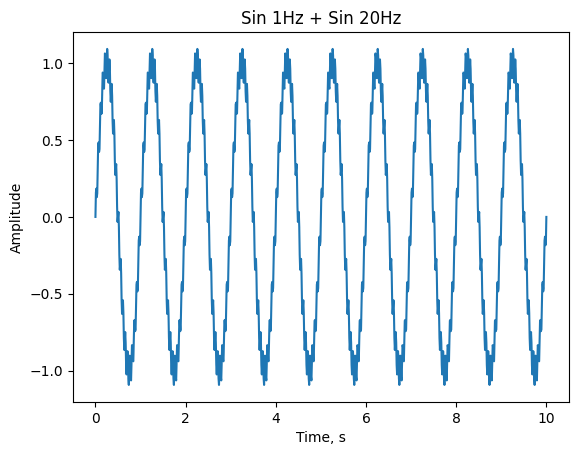

In [28]:
sin_20 = Relation(time, 0.1*np.sin(time.array*2*np.pi*20))
sum_sin1_sin20 = sin_1 + sin_20

r_time_1_20, r_amplitude_1_20 = sum_sin1_sin20.get_data()
plt.plot(r_time_1_20, r_amplitude_1_20)
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.title('Sin 1Hz + Sin 20Hz')

It's better if you use a Relation instance with an equal axis array, but 
sometimes you can't use. Then, when calculating math operation, new array axis 
found small sample and big boundaries. And y component of each relation 
interpolate with new common axis and extrapolate by zeros. After that, execute 
mathematical operation and return the result.  

Text(0.5, 1.0, 'New Sin 1Hz + Sin 20Hz')

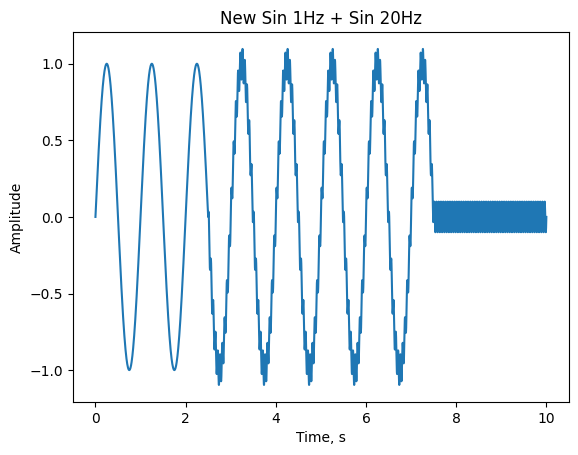

In [30]:
time1 = Axis.get_using_end(0., 7.5, 0.005)
time2 = Axis.get_using_end(2.5, 10., 0.001)

new_sin_1 = Relation(time1, np.sin(time1.array*2*np.pi))
new_sin_20 = Relation(time2, 0.1*np.sin(time2.array*2*np.pi*20))

new_sum_sin1_sin20 = new_sin_1 + new_sin_20

plt.plot(*new_sum_sin1_sin20.get_data())
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.title('New Sin 1Hz + Sin 20Hz')

To find two common axis for relations use class method `equalize`. This method 
use for math operations, convolution and correlations.

In [31]:
common_new_sin_1, common_new_sin_20 = Relation.equalize(new_sin_1, new_sin_20)

Available class methods to `correlate` and `convolve`.
Look on convolution triangle and rectangle.

Text(0.5, 1.0, 'Result Convolution')

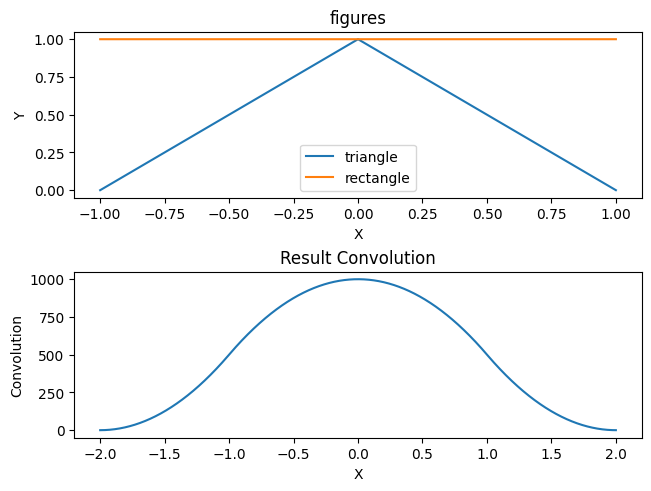

In [32]:
x = Axis.get_using_end(-1., 1., 0.001)

triangle = Relation(x, -1*(np.abs(x.array)-1))
rectangle = Relation(x, np.ones(x.size))

convolution = Relation.convolve(triangle, rectangle)

figure, axis = plt.subplots(2, 1, constrained_layout=True)

axis[0].plot(*triangle.get_data(), label='triangle')
axis[0].plot(*rectangle.get_data(), label='rectangle')
axis[0].set_title("figures")
axis[0].set_xlabel("X")
axis[0].set_ylabel("Y")
axis[0].legend()


axis[1].plot(*convolution.get_data())
axis[1].set_xlabel('X')
axis[1].set_ylabel('Convolution')
axis[1].set_title('Result Convolution')


## 4. Signal

The class `Signal` inherited from the class `Relation`.
It has the same operation as Relation class. Additional has operation to
convert signal to spectrum. 

List additional methods:

In [39]:
signal_sin_1 = Signal(sin_1)
signal_sin_1.get_spectrum()
signal_sin_1.get_amplitude_spectrum()
signal_sin_1.get_phase_spectrum()
signal_sin_1.get_reverse_signal()
signal_sin_1.add_phase(signal_sin_1)
signal_sin_1.sub_phase(signal_sin_1)

and has properties:
time and amplitude

In [40]:
print(signal_sin_1.time)
print(signal_sin_1.amplitude)

size: 1001
sample: 0.01
start: 0.0
end: 10.0

[ 0.00000000e+00  6.27905195e-02  1.25333234e-01 ... -1.25333234e-01
 -6.27905195e-02 -2.44929360e-15]


Let's check that the sum of sin 1 Hz and 20 Hz has an amplitude spectrum of 1 Hz 
and 20 Hz.

Text(0.5, 1.0, 'Amplitude spectrum Sin 1Hz + Sin 20Hz')

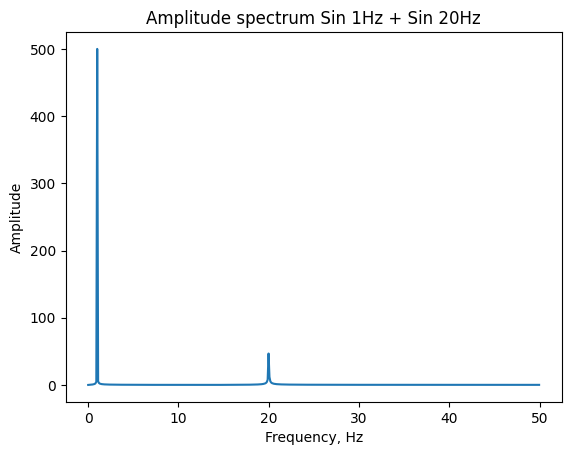

In [41]:
signal_sum_sin1_sin20 = Signal(sum_sin1_sin20)
plt.plot(*signal_sum_sin1_sin20.get_amplitude_spectrum()[0:50].get_data())
plt.xlabel('Frequency, Hz')
plt.ylabel('Amplitude')
plt.title('Amplitude spectrum Sin 1Hz + Sin 20Hz')


Where an operation with signal is expected, the spectrum instance will be converted 
to signal instance and operation will be with them.

## 5. Spectrum

The `Spectrum` class inherited from `Relation` class.
It has the same operation as Relation class. Additional has operation to
convert spectrum to signal. 

List additional methods: 

In [36]:
spectrum_sum_sin1_sin20 = signal_sum_sin1_sin20.get_spectrum()
spectrum_sum_sin1_sin20.get_amplitude_spectrum()
spectrum_sum_sin1_sin20.get_phase_spectrum()
spectrum_sum_sin1_sin20.get_reverse_filter()
spectrum_sum_sin1_sin20.add_phase(spectrum_sum_sin1_sin20)
spectrum_sum_sin1_sin20.sub_phase(spectrum_sum_sin1_sin20)

Class method `get_spectrum_from_amplitude_phase`

In [37]:
amplitude_spectrum = spectrum_sum_sin1_sin20.get_amplitude_spectrum()
phase_spectrum = spectrum_sum_sin1_sin20.get_phase_spectrum()

spectrum = Spectrum.get_from_amplitude_phase(amplitude_spectrum, phase_spectrum)

Where an operation with spectrum is expected, the signal instance will be converted 
to spectrum instance and operation will be with them.

## 6. Overriding methods

If the execution of any method of any class does not satisfy, then you can 
redefine it to the desired function before using it.
The main thing is that the signature of the new function matches the old method.
  
The following are examples for the methods of the Axis class. 
Both for normal methods and for static ones.

In [42]:
def new_get_array(axis: Axis):
    return np.ones(axis.size)
Axis.get_array = new_get_array

In [52]:
axis = Axis.get_using_end(0, 10, 1)
print(axis.array)


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [50]:
from signal_design.help_types import ArrayLike

def new_get_axis_from_array(array: ArrayLike):
    return Axis(2)
Axis.get_from_array = new_get_axis_from_array

In [51]:
axis = Axis.get_from_array([-1.0, -0.5, 0, 0.5])
print(axis)

size: 2
sample: 1
start: 0
end: None

